## 一般形式

In [1]:
import sympy
sympy.init_printing()

In [2]:
x, y, z = sympy.symbols("x, y, z")
f = sympy.Function("f")(x, y, z)
f_grad = [f.diff(x_) for x_ in (x, y, z)]
sympy.Matrix(f_grad)

⎡∂             ⎤
⎢──(f(x, y, z))⎥
⎢∂x            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎢∂y            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎣∂z            ⎦

## 1. $f(x,y)=x^2y+siny$，计算它的梯度形式

In [3]:
x, y = sympy.symbols("x, y")
f = x**2 * sympy.sin(y)
xy = sympy.Matrix([x, y])
f_grad = sympy.Matrix([f.diff(xy_) for xy_ in xy])
f_grad

⎡2⋅x⋅sin(y)⎤
⎢          ⎥
⎢ 2        ⎥
⎣x ⋅cos(y) ⎦

## 2.  $f(x,y)= x^2+y^2$

compute:
1. general gradient form
2. gradient value at  point $(1,2)$

In [4]:
x, y = sympy.symbols("x, y")
f2 = x**2 + y**2
f_grad2 = sympy.Matrix([f2.diff(xy) for xy in (x, y)])
f_grad2

⎡2⋅x⎤
⎢   ⎥
⎣2⋅y⎦

In [5]:
f_grad2.subs({x: 1, y: 2})

⎡2⎤
⎢ ⎥
⎣4⎦

### 使用`Scipy`

In [6]:
from scipy import optimize

f = lambda X: X[0]**2 + X[1]**2
optimize.approx_fprime([1., 2.], f, epsilon=1e-10)

array([2.00000017, 4.00000033])

## 函数及其梯度的可视化

### $f(x,y)=x^2+y^2$和它的梯度

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

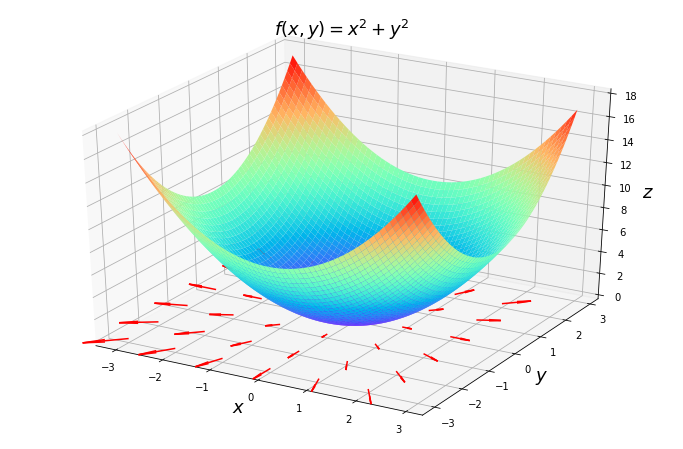

In [8]:
X = np.arange(-3, 3, 0.1)  
Y = np.arange(-3, 3, 0.1)  
X, Y = np.meshgrid(X, Y)    
Z = (X ** 2 + Y ** 2)  

fig = plt.figure(figsize=(12,8))  
ax = fig.add_subplot(111, projection='3d')  
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))  
X_sample = np.arange(X.min(), X.max(), 1)
Y_sample = np.arange(Y.min(), Y.max(), 1)
X_sample, Y_sample = np.meshgrid(X_sample, Y_sample)
X1= 2 * X_sample
X2= 2 * Y_sample
ax.quiver3D(X_sample, Y_sample, 0, X1, X2, 0, arrow_length_ratio=0.5, length=0.1, color='r')
ax.set_title("$f(x,y)=x^2+y^2$", fontsize=18)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_zlabel("$z$", fontsize=18)
plt.show()  

### $f(x,y)=xy$和它的梯度

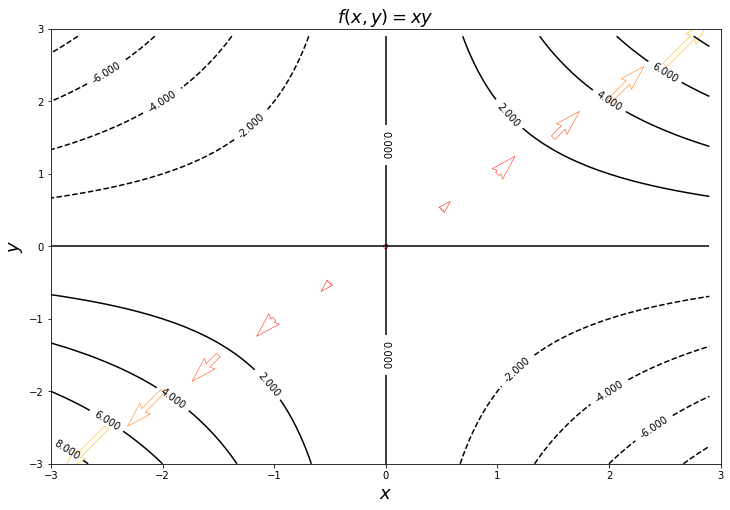

In [9]:
X = np.arange(-3, 3, 0.1)  
Y = np.arange(-3, 3, 0.1)  
X, Y = np.meshgrid(X, Y)    
Z = X * Y

fig = plt.figure(figsize=(12,8))  
ax = fig.add_subplot(111)
CS = plt.contour(X, Y, Z, 10, colors='k')
ax.clabel(CS)

X_sample = np.arange(-3, 3, 0.5)  
Y_sample = np.arange(-3, 3, 0.5)  
Z_sample = X_sample * Y_sample
ax.quiver(X_sample, Y_sample, X_sample, Y_sample, Z_sample, 
          edgecolor='b', facecolor='None', linewidth=.5, cmap='autumn')
ax.set_title("$f(x,y)=xy$", fontsize=18)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()  